# Problem Set 3

This problem set is based on lectures 9 and 10. For a complete list of topics please
consult page 2 of the course syllabus. Please consult the “Instructions for Problem
Set Submissions” document under course information before submitting your
assignment.

# Question 1

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations


Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users

In [8]:
# Steps 1 to 3
import pandas as pd
import numpy as np

#load the data from a website and name it to users
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')

users=users.set_index('user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


 # Step 4. Discover what is the mean age per occupation

In [2]:
users.groupby('occupation').mean()  #group by occupation to filter the data and then use mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [11]:
#First, I will create a column "is_Male" which it will check if each person is Male, it will assign 1, or zero otherwise.
users['is_Male']= np.where(users.gender == 'M', 1, 0)

# Male ratio is equal to the number of male of each ocuppation divided by total number of people of each occupation (female and male)

(users.groupby('occupation').is_Male.sum()/users.groupby('occupation').gender.count()).sort_values(ascending = False).round(2)

occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

# Step 6. For each occupation, calculate the minimum and maximum ages#

In [5]:
users.groupby('occupation').age.agg(['min', 'max'])


,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


# Step 7. For each combination of occupation and sex, calculate the mean age

In [13]:
users.groupby(['occupation','gender']).mean().head() #mean age for female and male within each occupation


age  is_Male
occupation    gender                    
administrator F       40.638889      0.0
              M       37.162791      1.0
artist        F       30.307692      0.0
              M       32.333333      1.0
doctor        M       43.571429      1.0


# Step 8. For each occupation present the percentage of women and men

In [14]:
#variable percentage will create a pivot table indexed by occupation and using gender as columns.
percentage = users.pivot_table(index='occupation', columns='gender',  aggfunc='size', fill_value=0)

#variabl calcTotal will take the pivot table with its columns F and M and will sum based on axis 1 (column)
sumFM = percentage[['F', 'M']].sum(axis=1)

#create a new column to store the % by taking the values of M and dividing it by the sum of F and M (sumFM)
percentage['% of Male'] = (100 * percentage['M'])/sumFM
percentage['% of Male'] = percentage['% of Male'].round(decimals=1)     ##round decimals to 1

#create a new column to store the % by taking the values of F and dividing it by the sum of F and M (sumFM)
percentage['% of Female'] = (100 * percentage['F'])/sumFM
percentage['% of Female'] = percentage['% of Female'].round(decimals=1)  #round decimals to 1

#drop extra columns F and M
percentage.drop(columns =['F'], inplace = True)
percentage.drop(columns =['M'], inplace = True)

percentage.sort_values(by='% of Male', ascending=False)

gender,% of Male,% of Female
occupation,,
doctor,100.0,0.0
engineer,97.0,3.0
technician,96.3,3.7
retired,92.9,7.1
programmer,90.9,9.1
executive,90.6,9.4
scientist,90.3,9.7
entertainment,88.9,11.1
lawyer,83.3,16.7


# Question 2
Euro Teams
Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12
Euro Teams

In [15]:
import pandas as pd
import numpy as np

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


# Step 4. Select only the Goal column

In [16]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

# Step 5. How many teams participated in the Euro2012?

In [17]:
euro12['Team'].count()

16

# Step 6. What is the number of columns in the dataset?

In [18]:
euro12.shape[1]

35

# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [19]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


# Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [28]:
#sort the dataframe by Red Cards and then by Yellow Cards
euro12.set_index('Team').sort_values(by=['Red Cards', 'Yellow Cards'])

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,2,...,13,76.5%,48,31,4,5,0,9,9,18
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
Russia,5,9,31,22.5%,12.5%,59,2,0,0,1,...,10,77.0%,34,43,4,6,0,7,7,16
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
Sweden,5,17,19,47.2%,13.8%,39,3,0,0,1,...,8,61.6%,35,51,7,7,0,9,9,18


# Step 9. Calculate the mean Yellow Cards given per Team

In [29]:
euro12['Yellow Cards'].mean()

7.4375

# Step 10. Filter teams that scored more than 6 goals


In [30]:
euro12[(euro12['Goals']>6)]
#euro12['Team'][euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


# Step 11. Select the teams that start with G

In [31]:
euro12[(euro12['Team'].str.startswith('G'))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


# Step 12. Select the first 7 columns

In [36]:
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


# Step 13. Select all columns except the last 3

In [38]:
euro12[euro12.columns[0:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [50]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
Housing

Step 1. Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

The first a random number from 1 to 4

The second a random number from 1 to 3

The third a random number from 10,000 to 30,000

In [5]:
import pandas as pd
import numpy as np
import random

In [9]:
import pandas as pd
import numpy as np
import random
A = pd.Series(np.random.randint(1,5,100))
B = pd.Series(np.random.randint(1,4,100))
C = pd.Series(np.random.randint(10000,30000,100))


In [8]:
#use pd.concat() from the Pandas library to link the 3 series created into one data frame
df = pd.concat([serie1, serie2, serie3], axis = 1)
df.head()

,serie1,serie2,serie3
0,2,1,26362
1,1,3,19805
2,1,1,15091
3,3,2,11610
4,3,2,12207


# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [10]:
#rename column names as requested
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,2,1,26362
1,1,3,19805
2,1,1,15091
3,3,2,11610
4,3,2,12207
...,...,...,...
95,2,1,13326
96,1,3,19200
97,1,2,29064
98,2,1,12020


# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [11]:
#reference: http://net-informations.com/ds/pd/comb.htm

bigcolumn = pd.DataFrame(columns = ['bigcolumn'])


#populate bigcolumn with the 3 series from the modified data frame df, starting from column 0 and through all columns avilable = columns[0:]
#use apply() to call the lambda function to apply changes to every row
#the lambda function will join columns from df and separate them by comas
# within lambda, x represents the values to join, that are converted to strings (error thrown if not)
    
bigcolumn['bigcolumn'] = df[df.columns[0:]].apply(lambda x: ', '.join(x.astype(str)),axis=1)
                        
bigcolumn

,bigcolumn
0,"2, 1, 26362"
1,"1, 3, 19805"
2,"1, 1, 15091"
3,"3, 2, 11610"
4,"3, 2, 12207"
...,...
95,"2, 1, 13326"
96,"1, 3, 19200"
97,"1, 2, 29064"
98,"2, 1, 12020"


# Step 6. Ops it seems it is going only until index 99. Is it true?

Answer: It is true based on the last step.

# Step 7. Reindex the DataFrame so it goes from 0 to 299

In [12]:
#convert dataframe to strings to split them into rows
bigcolumn['bigcolumn'] = bigcolumn['bigcolumn'].astype(str)

#drop existing column, and use join() to add the split content from bigcolumn following the ', ' pattern and expanding the split
#stack() to reshape the dataframe, and use reset_index
#rename the column dropped 

bigcolumn = bigcolumn.drop('bigcolumn', axis=1).join(bigcolumn['bigcolumn'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('bigcolumn'))

#reset_index again to organize the indexing from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)

bigcolumn

,bigcolumn
0,2
1,1
2,26362
3,1
4,3
...,...
295,1
296,12020
297,3
298,2


# Question 4
Step 1. Import the necessary libraries

Step 2. Import the dataset from the attached file wind.txt

In [32]:
import numpy as np
import pandas as pd
import datetime
data = pd.read_csv(r'C:\Users\manav\OneDrive\Desktop\12679944.txt', delimiter= '\s+', index_col=False)
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [33]:
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data['Date'] = pd.to_datetime(data.Date) #changed the format in date
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [34]:
data = data.drop(["Yr","Mo","Dy"], axis=1)
#index data based on the datatime column created
data.set_index('Date',inplace=True)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [36]:
data = pd.read_csv(r'C:\Users\manav\OneDrive\Desktop\12679944.txt',sep="\s+")
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data['Date'] = pd.to_datetime(data.Date) #changed the format in date
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,
data.Date,data.Date - pd.offsets.DateOffset(years=100))
data = data.drop(["Yr","Mo","Dy"], axis=1)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [37]:
data.Date.dtype

dtype('<M8[ns]')

In [39]:
data.index.astype("datetime64[ns]")

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000006564',
               '1970-01-01 00:00:00.000006565',
               '1970-01-01 00:00:00.000006566',
               '1970-01-01 00:00:00.000006567',
               '1970-01-01 00:00:00.000006568',
               '1970-01-01 00:00:00.000006569',
               '1970-01-01 00:00:00.000006570',
               '1970-01-01 00:00:00.000006571',
               '1970-01-01 00:00:00.000006572',
               '1970-01-01 00:00:00.000006573'],
              dtype=

# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [40]:
#https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
data.isnull().values.ravel().sum()

31

# Step 7. Compute how many non-missing values there are in total.

In [41]:
data.notnull().values.ravel().sum()

85431

# Step 8 Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [43]:
data.mean().mean()

C:\Users\manav\AppData\Local\Temp\ipykernel_107308\1710108345.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean().mean()


10.227982360836924

# Step 9 Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [44]:
loc_stats=data.agg(['min','max','mean','std']) 
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000,1961-01-01 00:00:00
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000,1978-12-31 00:00:00
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079,1969-12-31 12:00:00
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794,1897 days 21:28:19.220597120


# Step 10 Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [46]:
# use transpose() method to switch rows by columns, so now it is possible to describe() values for each of the 6,574 days.
day_stats=data.apply(pd.DataFrame.describe, axis=1)
day_stats

,count,unique,top,freq
0,12.0,11.0,15.04,2.0
1,12.0,12.0,14.71,1.0
2,12.0,12.0,18.50,1.0
3,13.0,13.0,10.58,1.0
4,13.0,13.0,13.33,1.0
...,...,...,...,...
6569,13.0,13.0,17.58,1.0
6570,13.0,13.0,13.21,1.0
6571,13.0,13.0,14.00,1.0
6572,13.0,13.0,18.50,1.0


# Step 11. Find the average windspeed in January for each location.

In [47]:
data.set_index('Date',inplace=True)
jan_data = data[data.index.month == 1]
jan_data.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

# Step 12. Downsample the record to a yearly frequency for each location.

In [48]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


# Step 13. Downsample the record to a monthly frequency for each location.

In [49]:
#same as above but go by Month
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


# Step 14. Downsample the record to a weekly frequency for each location.

In [50]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [51]:
new_df= data.groupby(data.index.to_period('W')).mean().apply(lambda x: [x.count(),x.min(),x.max(),x.mean(),x.std()])
new_df = new_df.rename( index={0: 'count',1: 'min',2: 'max',3: 'mean',4: 'std'})
new_df

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,940.000000,940.000000,940.000000,940.000000,939.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286
mean,12.365304,10.647725,11.661255,6.309334,10.455607,7.094787,9.801271,8.496123,8.496452,8.710639,13.125912,15.597171
std,3.466600,3.372501,2.840361,2.186432,3.146715,2.556633,3.308180,2.853029,2.638349,2.924546,3.757189,4.468526


# Question 5
Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

In [52]:
import pandas as pd
import numpy as np

#variable chipo that reads the dataset
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

#first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# Step 5. What is the number of observations in the dataset?

In [53]:
chipo.shape[0]

4622

# Step 6. What is the number of columns in the dataset?

In [54]:
chipo.shape[1]

5

# Step 7. Print the name of all the columns.

In [55]:
#for loop to iterate through the columns of chipo and print each one
for colName in chipo.columns :
    print(colName)


order_id
quantity
item_name
choice_description
item_price


# Step 8. How is the dataset indexed?

In [56]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

# Step 9. Which was the most-ordered item?

In [57]:
orders=chipo.groupby('item_name').sum()                    #group by item and sum up
orders = orders.sort_values(['quantity'], ascending=False) #order by quantity and descending to identify the top first
orders.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


# Step 10. For the most-ordered item, how many items were ordered?

In [58]:
orders[['quantity']].head(1) # 761 items ordered

,quantity
item_name,
Chicken Bowl,761


# Step 11. What was the most ordered item in the choice_description column?

In [59]:
chipo.groupby(['choice_description']).sum().sort_values('quantity', ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


# Step 12. How many items were orderd in total?

In [60]:
#same as above. sum() values of column quanity
print('{} items were ordered in total'.format(chipo['quantity'].sum(axis = 0)))

4972 items were ordered in total


# Step 13a - Turn the item price into a float

In [85]:
#create a temporary df to split the item_pirce column by $
temp_df = chipo['item_price']
  
chipo['$$']= temp_df[0]
chipo['price']= temp_df[1]

#drop extra columns
chipo.drop(columns =['$$'], inplace = True)
chipo.drop(columns =['item_price'], inplace = True)

#rename amount column back to item_price
chipo.rename(columns = {'price':'item_price'}, inplace = True)

In [86]:
#convert datatype to float
chipo['item_price'] = chipo['item_price'].astype(float)

# Step 13b - Turn the item price into a float

In [87]:
chipo.item_price.dtype

dtype('float64')

# Step 13c. Create a lambda function and change the type of item price

In [ ]:
#convert datatype to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))

# Step 13c. Check the item price type

In [90]:
chipo.item_price.dtype

dtype('float64')

# Step 14. How much was the revenue for the period in the dataset?

In [95]:
(chipo['quantity']*chipo['item_price']).sum()

16855.08

# Step 15. How many orders were made in the period?

In [96]:
chipo.order_id.value_counts().count()

1834

# Step 16. What is the average revenue amount per order?

In [97]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.groupby(by=['order_id']).sum().mean()['revenue']

9.19033805888781

# Step 17. How many different items are sold?

In [98]:
chipo.item_name.value_counts().count()

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [99]:
#Create a line plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'C:\Users\manav\Downloads\us-marriages-divorces-1867-2014.csv', index_col=0)
df

,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
Year,,,,,
1867,357000.0,10000.0,36970000,9.7,0.3
1868,345000.0,10000.0,37885000,9.1,0.3
1869,348000.0,11000.0,38870000,9.0,0.3
1870,352000.0,11000.0,39905000,8.8,0.3
1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...
2007,2197000.0,856000.0,301696000,7.3,2.8
2008,2157000.0,844000.0,304543000,7.1,2.8
2009,2080000.0,840000.0,307240000,6.8,2.7


<Figure size 1296x648 with 0 Axes>

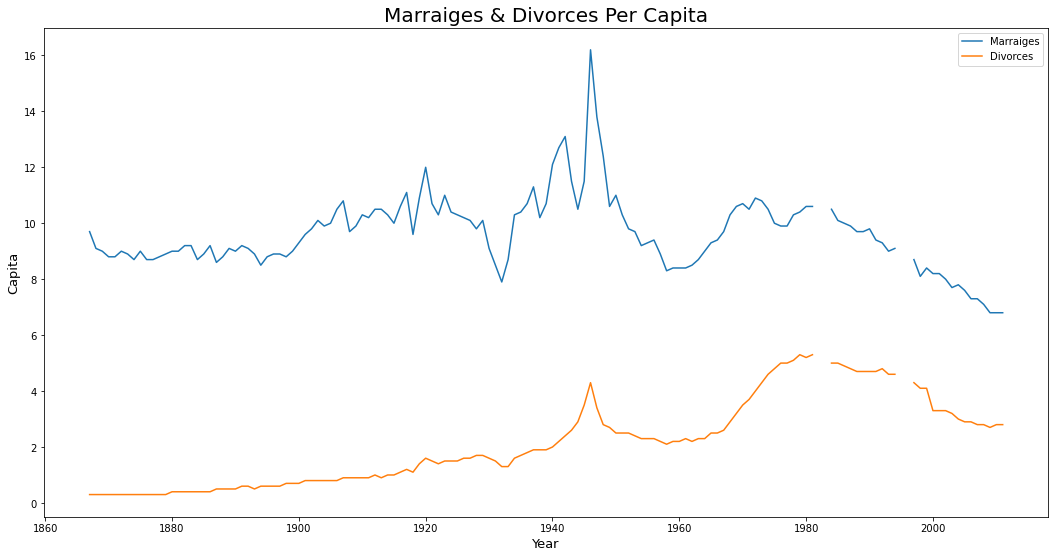

In [100]:
plt.rcParams["figure.figsize"] = [18,9]
plt.figure()

df.plot( y = ['Marriages_per_1000','Divorces_per_1000'],use_index=True,
label = ['Marraiges' , 'Divorces'])
plt.title('Marraiges & Divorces Per Capita', color = 'k', fontsize = 20)
plt.xlabel('Year', color = 'k', fontsize = 13)
plt.ylabel('Capita', color = 'k', fontsize = 13)
plt.show()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

Don't forget to label your axes!

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r'C:\Users\manav\Downloads\us-marriages-divorces-1867-2014.csv',header=0, sep=",")
new_df = df.loc[df.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
new_df

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


C:\Users\manav\AppData\Local\Temp\ipykernel_124060\2647613820.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  new_df[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()


([<matplotlib.axis.XTick at 0x18929f23550>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

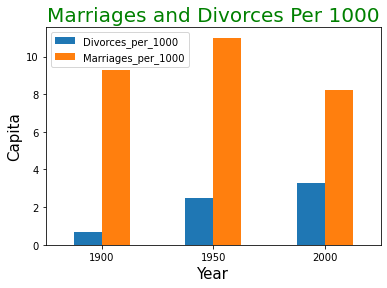

In [7]:
new_df[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title("Marriages and Divorces Per 1000", color = 'Green', fontsize = 20)
plt.xlabel('Year', color = 'k', fontsize = 15)
plt.ylabel('Capita', color = 'k', fontsize = 15)
positions = (0,1,2)
labels = ("1900", "1950", "2000")
plt.xticks(positions, labels, rotation = 0)

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r'C:\Users\manav\Downloads\actor_kill_counts.csv')
new_df = df.sort_values("Count", ascending = True)

Text(0, 0.5, 'Actor')

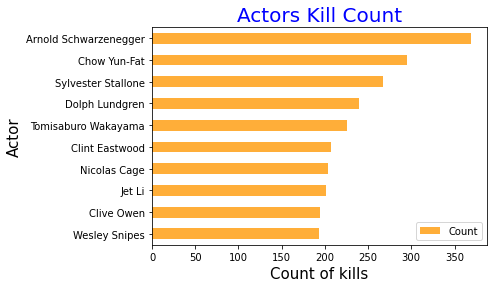

In [10]:
new_df.plot.barh(x='Actor', y='Count', color = '#FFAE39')
plt.title('Actors Kill Count', fontsize=20, color = 'Blue')
plt.xlabel('Count of kills', color = 'k', fontsize = 15)
plt.ylabel('Actor', color = 'k', fontsize = 15)

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

df = pd.read_csv(r'C:\Users\manav\Downloads\roman-emperor-reigns.csv')
new_df = df.groupby("Cause_of_Death")['Emperor'].count()

Text(0.5, 1.0, "Roman Emperor's Cause of Death")

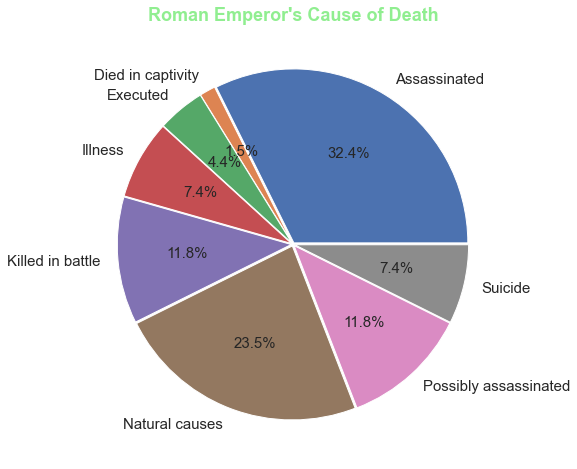

In [13]:
new_df.plot.pie(autopct="%.1f%%", figsize = (8,8) , fontsize = 15, ylabel = '', explode=[0.01]*8)
plt.title("Roman Emperor's Cause of Death", color = 'Lightgreen', fontsize = 18, fontweight ='bold')

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes!

Color each dot according to its year.

In [15]:
#Create a scatter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
revenue = pd.read_csv(r'C:\Users\manav\Downloads\arcade-revenue-vs-cs-doctorates.csv', index_col=0)

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

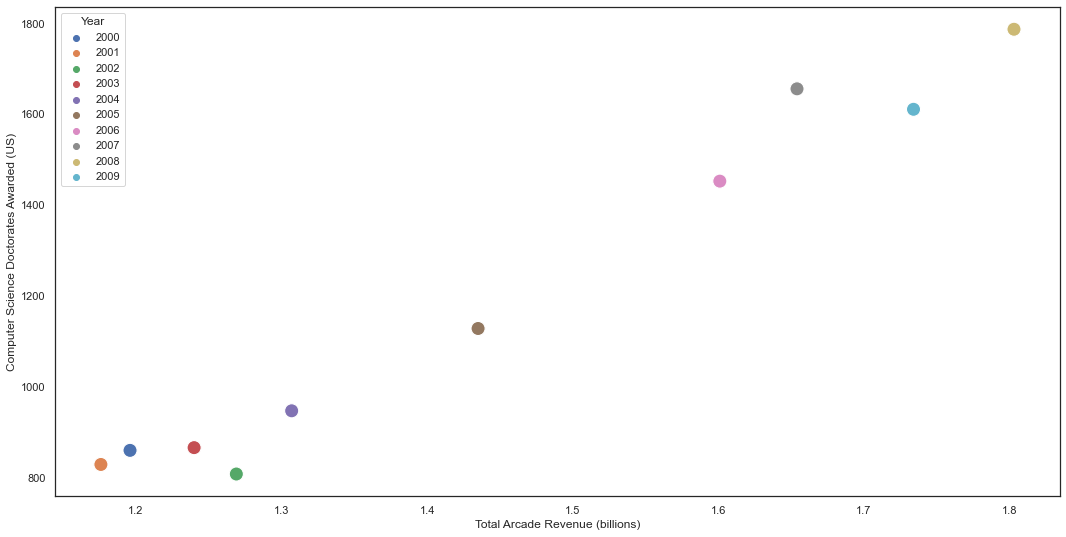

In [16]:
sns.set(rc = {'figure.figsize':(18,9)})
sns.set_theme(style="white")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', 
                hue='Year', data=revenue, palette="deep",s=200)